In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   # визуализация
import seaborn as sns
from sklearn.preprocessing import StandardScaler   # стандартизация
from sklearn.cluster import KMeans   #кластеризация
from sklearn.metrics import silhouette_samples, silhouette_score   #силуэт
from sklearn.preprocessing import OneHotEncoder   # унитарный кодировщик
from yellowbrick.cluster import SilhouetteVisualizer

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Кластеризация банков

In [13]:
banks = pd.read_excel('/content/drive/MyDrive/Banki.xlsx')
banks.head()

№              Банк      Город  Активы  Собственный капитал  \
0  1        «Авангард»     Москва  122109                20440   
1  2           «Аверс»     Казань  110741                24410   
2  3           «Агора»     Москва    1114                  356   
3  4  «Агропромкредит»  Лыткарино   18774                 2332   
4  5         «Агророс»    Саратов    7917                 1157   

   Средства физлиц  Кредиты НБС-нетто  Кредиты физлицам  
0            35443              32728              3319  
1            34918              13613              4924  
2              274                351               206  
3            12047               6484               903  
4             3564               1909               492

In [14]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   №                    363 non-null    int64 
 1   Банк                 363 non-null    object
 2   Город                363 non-null    object
 3   Активы               363 non-null    int64 
 4   Собственный капитал  363 non-null    int64 
 5   Средства физлиц      363 non-null    int64 
 6   Кредиты НБС-нетто    363 non-null    int64 
 7   Кредиты физлицам     363 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 22.8+ KB


In [15]:

print(banks.shape[0] == len(banks.Банк.unique()))

True


In [16]:

ohe = OneHotEncoder().fit(banks[['Город']])
coded = pd.DataFrame(ohe.transform(banks[['Город']]).toarray(), columns=ohe.categories_)

In [17]:

df_banks = banks.drop(columns = ['№', 'Банк', 'Город'])


df2 = pd.concat([df_banks, coded], axis = 1)
df2.columns = df2.columns.map(''.join)
df2.head()

Активы  Собственный капитал  Средства физлиц  Кредиты НБС-нетто  \
0  122109                20440            35443              32728   
1  110741                24410            34918              13613   
2    1114                  356              274                351   
3   18774                 2332            12047               6484   
4    7917                 1157             3564               1909   

   Кредиты физлицам  Абакан  Арзамас  Астрахань  Балаково  Барнаул  ...  \
0              3319     0.0      0.0        0.0       0.0      0.0  ...   
1              4924     0.0      0.0        0.0       0.0      0.0  ...   
2               206     0.0      0.0        0.0       0.0      0.0  ...   
3               903     0.0      0.0        0.0       0.0      0.0  ...   
4               492     0.0      0.0        0.0       0.0      0.0  ...   

   Ульяновск  Уфа  Химки  Чебоксары  Челябинск  Черкесск  Шахты  \
0        0.0  0.0    0.0        0.0        0.0       0.0    0.0   
1        0.0  0.0    0.0        0.0        0.0       0.0    0.0   
2        0.0  0.0    0.0        0.0        0.0       0.0    0.0   
3        0.0  0.0    0.0        0.0        0.0       0.0    0.0   
4        0.0  0.0    0.0        0.0        0.0       0.0    0.0   

   Южно-Сахалинск  Якутск  Ярославль  
0             0.0     0.0        0.0  
1             0.0     0.0        0.0  
2             0.0     0.0        0.0  
3             0.0     0.0        0.0  
4             0.0     0.0        0.0  

[5 rows x 92 columns]

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(df2)

In [22]:


models = [KMeans(n_clusters = k, random_state=28).fit(X) for k in range(2, 11)]


s_sc = [float(silhouette_score(X, model.labels_)) for model in models]


plt.plot(range(2, 11), s_sc, color='blue')
plt.xlabel("Число кластеров")
plt.ylabel("Значение силуэта")
plt.title("Индексы силуэта")
plt.show()

In [23]:


dist = [i.inertia_ for i in models]


plt.plot(range(2, 11), dist, color='blue', marker="o")
plt.xlabel("Число кластеров")
plt.ylabel("Сумма расстояний")
plt.title("Метод локтя")
plt.show()

In [24]:

kmeans = KMeans(n_clusters = 9).fit(X)   
banks['cluster'] = kmeans.predict(X)   

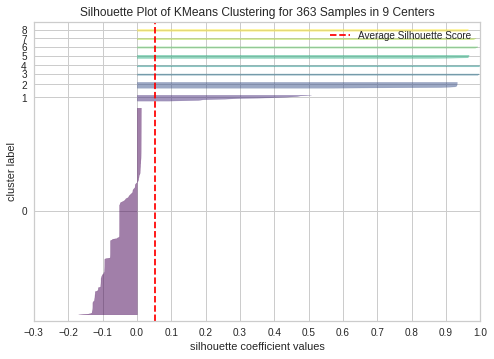

In [25]:

visualizer = SilhouetteVisualizer(kmeans, colors='viridis').fit(X)
visualizer.show()